# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` aggregation functions (like `.sum()` and `.max()`) instead of writing for-loops
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
%matplotlib inline
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
sharks_df = pd.read_csv("/data301/data/sharktank.csv")

There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
just_sharks = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington"]
sharks_df[just_sharks] = sharks_df[just_sharks].fillna(0)
sharks_df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
sharks_df.Amount = sharks_df[sharks_df.Deal == "Yes"].Amount.str.replace("$","").str.replace(",","").astype(int)

In [5]:
sharks_df.Equity = sharks_df[sharks_df.Deal == "Yes"].Equity.str.replace("%","").str.replace("n/a", "0").astype(float)

In [6]:
sharks_df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [7]:
sharks_df["Valuation"] = sharks_df[sharks_df.Deal == "Yes"].Amount / (sharks_df[sharks_df.Deal == "Yes"].Equity / 100)
max_val = sharks_df[(sharks_df.Deal == "Yes") & (sharks_df.Equity != 0)].Valuation.max()
sharks_df[sharks_df.Valuation == max_val]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation
421,6.0,11.0,Zipz,Yes,Food and Beverage,Male,2500000.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,with an option for another $2.5 Million for an...,25000000.0


In [8]:
max_amt = sharks_df[sharks_df.Deal == "Yes"].Amount.max()
sharks_df[sharks_df.Amount == max_amt]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation
483,6.0,27.0,AirCar,Yes,Green/CleanTech,Male,5000000.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,Contingent on getting deal to bring to contine...,10000000.0


The "Zipz" company was the most valuable, valued at 25 million dollars. O'Leary invested 2.5 million dollars at a 10% equity. However, this isn't the most that was invested by a shark: the "AirCar" company received 5 million dollars, but at a 50% equity, only valued at 10 million dollars. 

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [9]:
sums = sharks_df.loc[:, "Corcoran":"Guest"].sum(axis=1)
each_amounts = sharks_df.Amount.divide(sums)
sharks_df.loc[:, "Corcoran":"Guest"].multiply(each_amounts, axis=0).sum()

Corcoran       4912500.0
Cuban         17817500.0
Greiner        8170000.0
Herjavec      16297500.0
John           8154000.0
O'Leary        7952500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

According to the calculations, Cuban invested the most money over the 6 seasons at a total of 17,817,500 dollars 

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

In [10]:
industry_funded = sharks_df[sharks_df.Deal == "Yes"].groupby("Industry").Deal.count() / sharks_df.groupby("Industry").Deal.count()

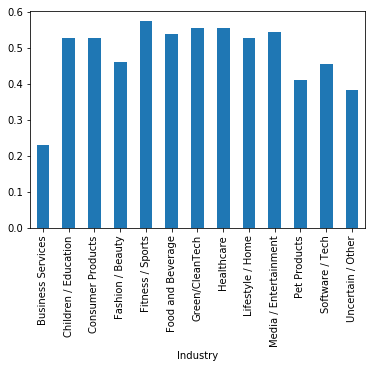

In [11]:
industry_funded.plot.bar()

Looking at the plot, it looks like the Fitness/Sports industry has the highest funding rate, and the Business Services industry has the lowest funding rate. 

## Preparing for Submission

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.
4. Go to `File > Save Notebook`.

When you have finished both Lab A and Lab B, please read the `Submission Instructions.ipynb` for instructions on how to submit the entire lab.